## Remote Work & Mental Health (Trabalho Remoto e Saúde Mental)

[Remote Work & Mental Health](https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health)

### Sobre o conjunto de dados

Com **5.000 registros** coletados de funcionários no mundo todo, este conjunto de dados fornece insights valiosos sobre áreas-chave como local de trabalho (**remoto, híbrido, no local)**, **níveis de estresse**, acesso a recursos de **saúde mental e satisfação no trabalho**. Ele foi projetado para ajudar pesquisadores, profissionais de RH e empresas a avaliar a crescente influência do trabalho remoto na produtividade e no **bem-estar**.

#### Colunas

### Códigos

In [23]:
# Instale o pandasql
!pip install pandasql

In [24]:
# Bibliotecas
import pandas as pd
import numpy as np
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

TB_REMOTE_WORK_ON_MENTAL_HEALTH = pd.read_csv('/content/drive/MyDrive/Análise SQL Drive /Impact_of_Remote_Work_on_Mental_Health.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Exemplo de consulta SQL usando pandasql

query = """
SELECT *
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
"""


# Execute a consulta
result = ps.sqldf(query, locals())
(result.head())

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [22]:
query2 = """
SELECT
COUNT(*) AS TOTAL_REGISTROS,
COUNT(DISTINCT (Employee_ID)) AS TOTAL_FUNCIONARIOS_UNICOS_REGISTRADOS
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
"""


# Execute a consulta
result2 = ps.sqldf(query2, locals())
(result2)

,TOTAL_REGISTROS,TOTAL_FUNCIONARIOS_UNICOS_REGISTRADOS
0,5000,5000


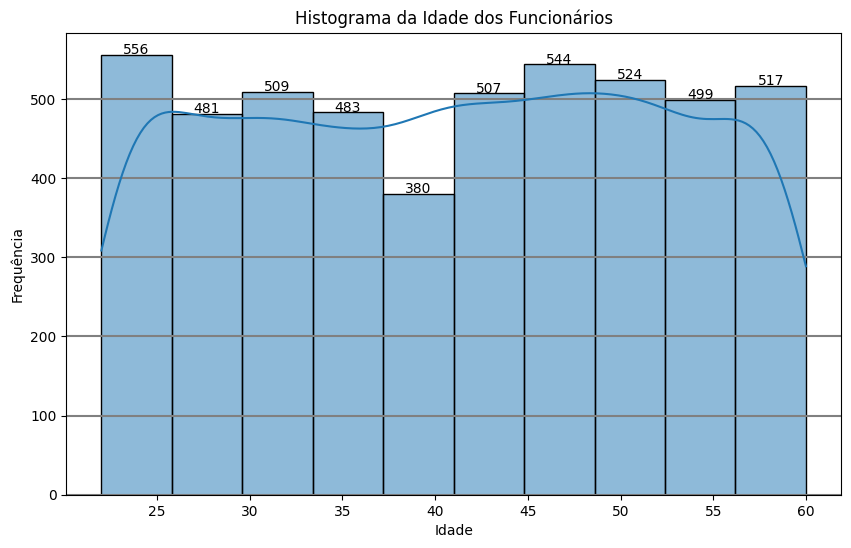

In [45]:
# Crie o histograma da idade dos funcionários
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Age'], bins=10, kde=True)  # kde=True adiciona uma linha de densidade

# Personalize o gráfico
plt.title('Histograma da Idade dos Funcionários')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Adicione apenas linhas horizontais sólidas na grade
plt.grid(True, axis='y', linestyle='-', linewidth=1.5, color='gray')

# Adicione os rótulos de frequência no topo de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Adiciona rótulos apenas para barras com altura > 0
        ax.text(p.get_x() + p.get_width() / 2, height + 1,  # Ajuste para posicionamento
                f'{int(height)}', ha="center", fontsize=10)

plt.show()

In [71]:

query3_1 = """
SELECT
Work_Location AS Local_de_Trabalho,
COUNT(Work_Location) AS Quantidade_Local_de_Trabalho
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
GROUP BY Work_Location
ORDER BY Quantidade_Local_de_Trabalho DESC;
"""

# Execute a consulta
result3_1 = ps.sqldf(query3_1, locals())
(result3_1)

,Local_de_Trabalho,Quantidade_Local_de_Trabalho
0,Remote,1714
1,Hybrid,1649
2,Onsite,1637


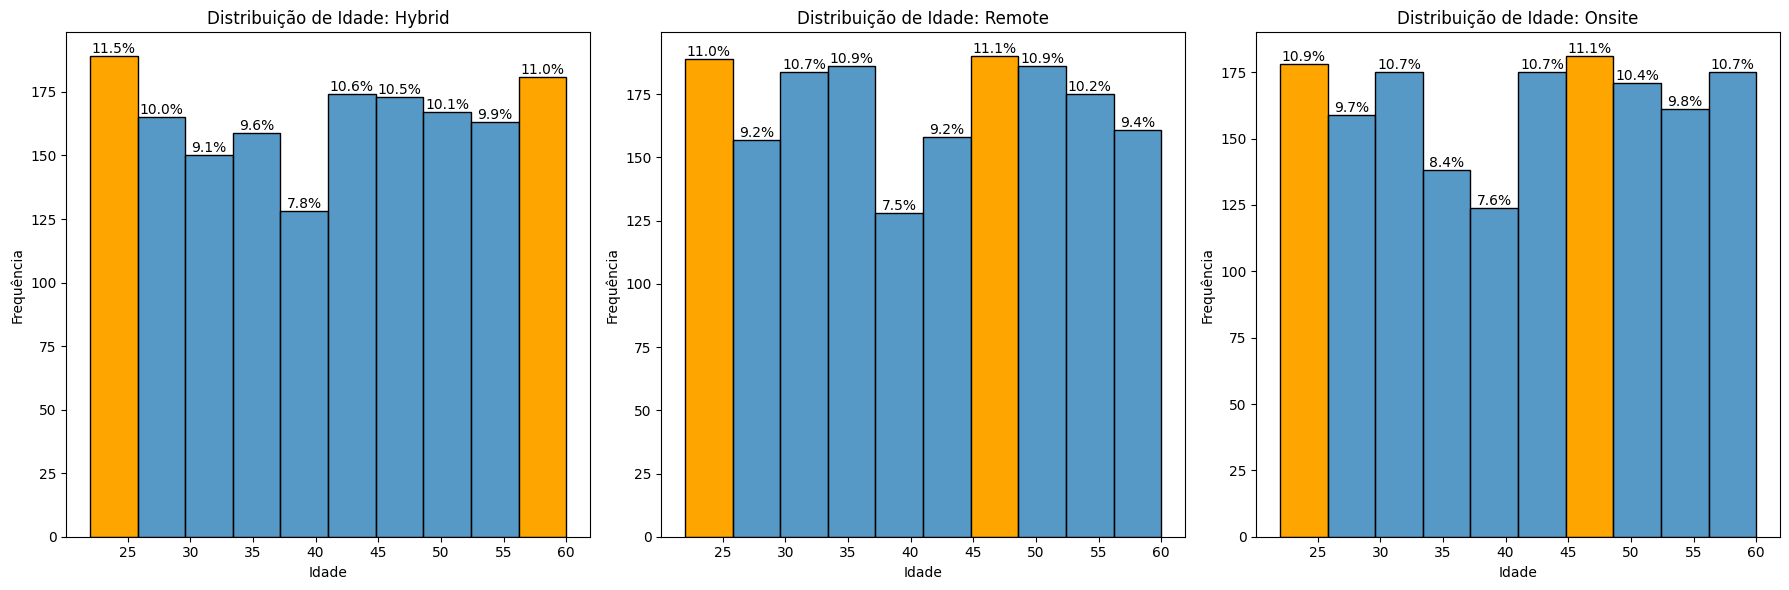

In [69]:
# Filtrando os modelos de trabalho
work_locations = data['Work_Location'].unique()

# Configurando o tamanho da figura
plt.figure(figsize=(18, 6))

# Loop para criar um gráfico para cada modelo de trabalho
for i, location in enumerate(work_locations, 1):
    plt.subplot(1, 3, i)

    # Filtrando os dados para o modelo de trabalho específico
    subset = data[data['Work_Location'] == location]

    # Criando o histograma e armazenando o objeto retornado
    hist = sns.histplot(data=subset, x='Age', bins=10, kde=False)

    # Calculando as porcentagens para cada barra
    total = subset.shape[0]
    heights = []
    for p in hist.patches:
        height = p.get_height()
        heights.append(height)
        percentage = (height / total) * 100  # Calculando a porcentagem
        plt.annotate(f'{percentage:.1f}%',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10)

    # Destacando as duas barras mais altas
    top_two_indices = np.argsort(heights)[-2:]  # Índices das duas barras mais altas
    for index in top_two_indices:
        hist.patches[index].set_facecolor('orange')  # Cor da barra destacada
        hist.patches[index].set_edgecolor('black')  # Contorno da barra

    # Personalizando o gráfico
    plt.title(f'Distribuição de Idade: {location}')
    plt.xlabel('Idade')
    plt.ylabel('Frequência')

# Ajustando o layout
plt.tight_layout()
plt.show()

In [125]:
query4_2 = """
SELECT
Stress_Level AS Nível_de_Estresse,
COUNT(Employee_ID) AS Quantidade_de_Funcionários
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
GROUP BY Stress_Level
ORDER BY Quantidade_de_Funcionários Desc;
"""

# Execute a consulta
result4_2 = ps.sqldf(query4_2, locals())
(result4_2)

,Nível_de_Estresse,Quantidade_de_Funcionários
0,High,1686
1,Medium,1669
2,Low,1645


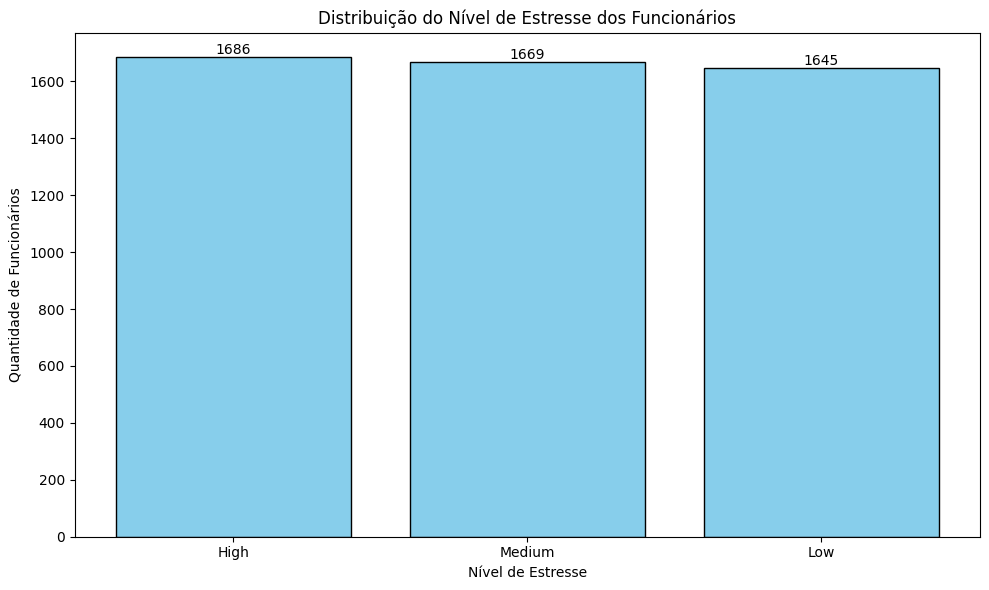

In [126]:
result4_2 = ps.sqldf(query4_2, locals())

# Garantindo que todas as categorias estejam presentes
categorias_estresse = ['High', 'Medium', 'Low']  # As categorias esperadas
quantidades = [0, 0, 0]  # Iniciando quantidades com 0

# Preenchendo as quantidades com base nos dados retornados
for i, categoria in enumerate(categorias_estresse):
    if categoria in result4_2['Nível_de_Estresse'].values:
        quantidades[i] = result4_2.loc[result4_2['Nível_de_Estresse'] == categoria, 'Quantidade_de_Funcionários'].values[0]

# Criando um novo DataFrame para o gráfico
dados_grafico = pd.DataFrame({
    'Nível_de_Estresse': categorias_estresse,
    'Quantidade_de_Funcionários': quantidades
})

# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras
bars = plt.bar(dados_grafico['Nível_de_Estresse'], dados_grafico['Quantidade_de_Funcionários'], color='skyblue', edgecolor='black')

# Adicionando os rótulos centralizados acima de cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico
plt.title('Distribuição do Nível de Estresse dos Funcionários')
plt.xlabel('Nível de Estresse')
plt.ylabel('Quantidade de Funcionários')

# Ajustando o layout
plt.tight_layout()
plt.show()

In [91]:
query4_3 = """
SELECT
Job_Role AS Cargo,
Stress_Level AS Nível_de_Estresse,
COUNT(Employee_ID) AS Quantidade_de_Funcionários
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
WHERE Stress_Level = 'High'
GROUP BY Job_Role
ORDER BY Quantidade_de_Funcionários Desc;
"""

# Execute a consulta
result4_3 = ps.sqldf(query4_3, locals())
(result4_3)

,Cargo,Nível_de_Estresse,Quantidade_de_Funcionários
0,Sales,High,253
1,Project Manager,High,253
2,Designer,High,252
3,Data Scientist,High,242
4,Software Engineer,High,234
5,HR,High,227
6,Marketing,High,225


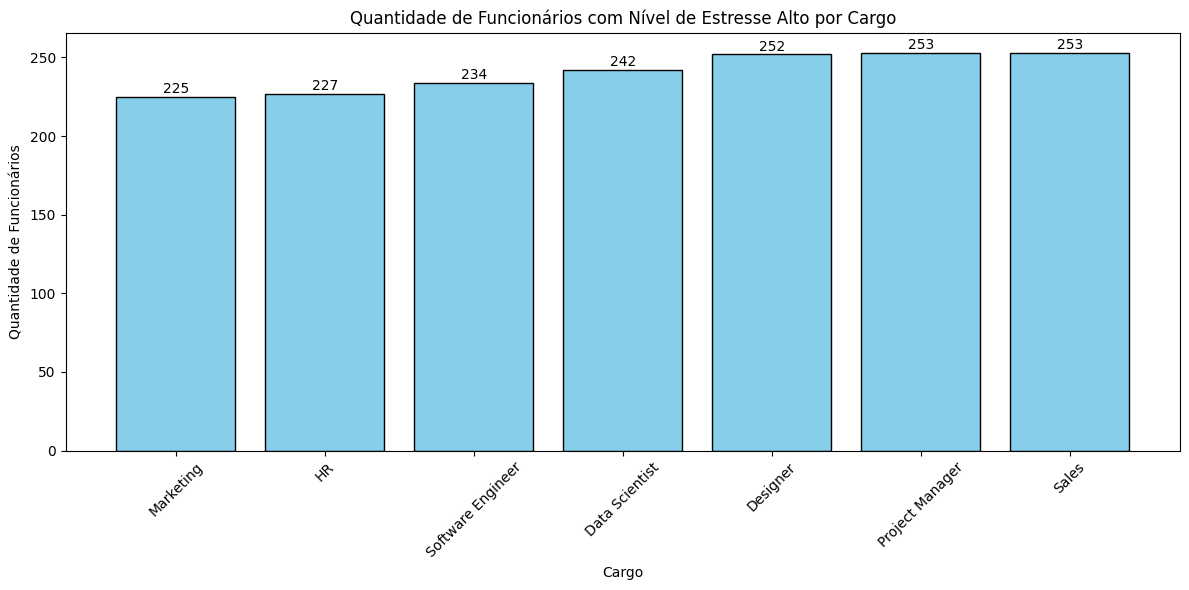

In [127]:
# Execute a consulta
result4_3 = ps.sqldf(query4_3, locals())

# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Criando o gráfico de barras
bars = plt.bar(result4_3['Cargo'], result4_3['Quantidade_de_Funcionários'], color='skyblue', edgecolor='black')

# Adicionando os rótulos centralizados acima de cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico
plt.title('Quantidade de Funcionários com Nível de Estresse Alto por Cargo')
plt.xlabel('Cargo')
plt.ylabel('Quantidade de Funcionários')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Ajustando o layout
plt.tight_layout()
plt.show()

In [94]:
query4_4 = """
SELECT
Industry AS Industria,
Stress_Level AS Nível_de_Estresse,
COUNT(Employee_ID) AS Quantidade_de_Funcionários
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
WHERE Stress_Level = 'High'
GROUP BY Industry
ORDER BY Quantidade_de_Funcionários Desc;
"""

# Execute a consulta
result4_4 = ps.sqldf(query4_4, locals())
(result4_4)

,Industria,Nível_de_Estresse,Quantidade_de_Funcionários
0,Finance,High,266
1,Healthcare,High,257
2,Retail,High,248
3,IT,High,243
4,Education,High,238
5,Consulting,High,219
6,Manufacturing,High,215


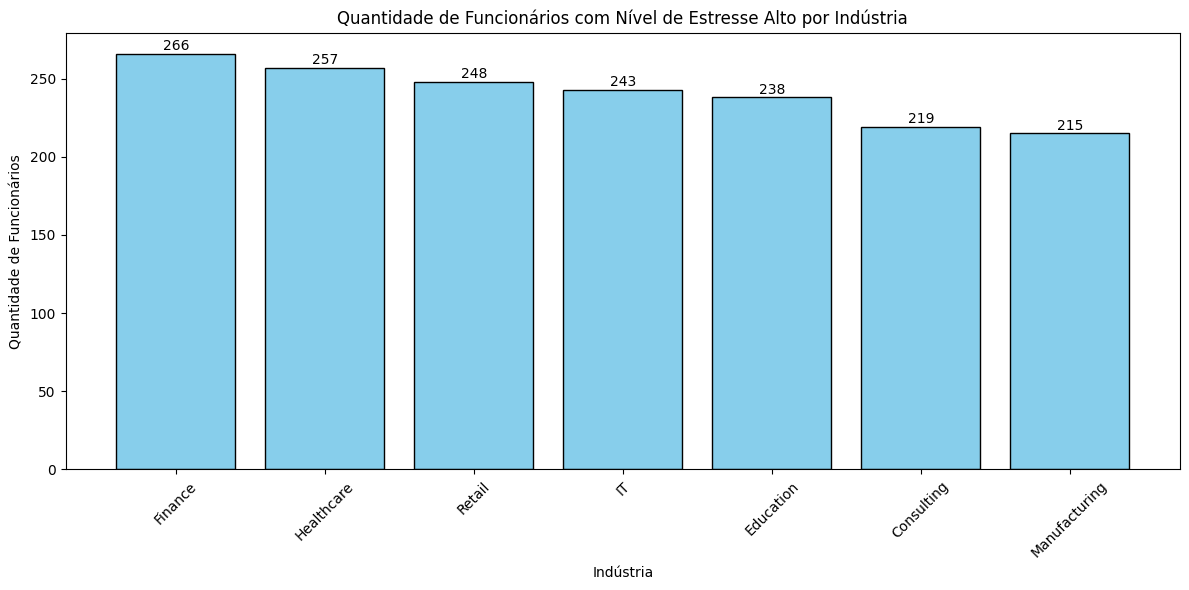

In [128]:
# Execute a consulta
result4_4 = ps.sqldf(query4_4, locals())

# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Criando o gráfico de barras
bars = plt.bar(result4_4['Industria'], result4_4['Quantidade_de_Funcionários'], color='skyblue', edgecolor='black')

# Adicionando os rótulos centralizados acima de cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico
plt.title('Quantidade de Funcionários com Nível de Estresse Alto por Indústria')
plt.xlabel('Indústria')
plt.ylabel('Quantidade de Funcionários')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Ajustando o layout
plt.tight_layout()
plt.show()

In [138]:
query4_6 = """
SELECT
Mental_Health_Condition AS Condição_de_Saúde_Mental,
Stress_Level AS Nível_de_Estresse,
COUNT(Employee_ID) AS Quantidade_de_Funcionários
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
WHERE Stress_Level = 'High'
GROUP BY Mental_Health_Condition
ORDER BY Quantidade_de_Funcionários Desc;
"""

# Execute a consulta
result4_6 = ps.sqldf(query4_6, locals())
(result4_6)

,Condição_de_Saúde_Mental,Nível_de_Estresse,Quantidade_de_Funcionários
0,Burnout,High,445
1,Anxiety,High,438
2,None,High,402
3,Depression,High,401


In [103]:
query4_7 = """
SELECT
Job_Role AS Cargo,
Mental_Health_Condition AS Condição_de_Saúde_Mental,
Stress_Level AS Nível_de_Estresse,
COUNT(Employee_ID) AS Quantidade_de_Funcionários
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
WHERE 0=0
AND Stress_Level = 'High'
AND Mental_Health_Condition = 'Burnout'
GROUP BY Job_Role
ORDER BY Quantidade_de_Funcionários Desc;
"""

# Execute a consulta
result4_7 = ps.sqldf(query4_7, locals())
(result4_7)

,Cargo,Condição_de_Saúde_Mental,Nível_de_Estresse,Quantidade_de_Funcionários
0,Data Scientist,Burnout,High,84
1,Designer,Burnout,High,74
2,HR,Burnout,High,66
3,Sales,Burnout,High,62
4,Project Manager,Burnout,High,56
5,Marketing,Burnout,High,52
6,Software Engineer,Burnout,High,51


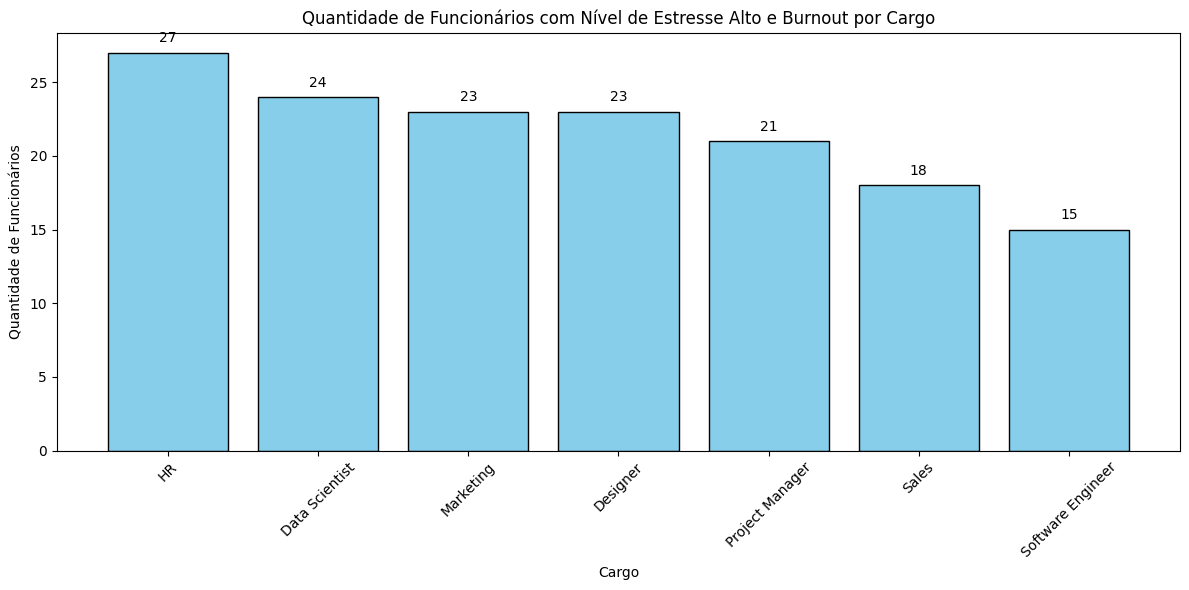

In [140]:
# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Criando o gráfico de barras
bars = plt.bar(result4_7['Cargo'], result4_7['Quantidade_de_Funcionários'], color='skyblue', edgecolor='black')

# Adicionando os rótulos centralizados acima de cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico
plt.title('Quantidade de Funcionários com Nível de Estresse Alto e Burnout por Cargo')
plt.xlabel('Cargo')
plt.ylabel('Quantidade de Funcionários')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Ajustando o layout
plt.tight_layout()
plt.show()

In [106]:
query4_7 = """
SELECT
Job_Role AS Cargo,
Productivity_Change AS Mudança_de_Produtividade,
Mental_Health_Condition AS Condição_de_Saúde_Mental,
Stress_Level AS Nível_de_Estresse,
COUNT(Employee_ID) AS Quantidade_de_Funcionários
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
WHERE 0=0
AND Productivity_Change = 'Decrease'
AND Stress_Level = 'High'
AND Mental_Health_Condition = 'Burnout'
GROUP BY Job_Role
ORDER BY Quantidade_de_Funcionários Desc;
"""

# Execute a consulta
result4_7 = ps.sqldf(query4_7, locals())
(result4_7)

,Cargo,Mudança_de_Produtividade,Condição_de_Saúde_Mental,Nível_de_Estresse,Quantidade_de_Funcionários
0,HR,Decrease,Burnout,High,27
1,Data Scientist,Decrease,Burnout,High,24
2,Marketing,Decrease,Burnout,High,23
3,Designer,Decrease,Burnout,High,23
4,Project Manager,Decrease,Burnout,High,21
5,Sales,Decrease,Burnout,High,18
6,Software Engineer,Decrease,Burnout,High,15


In [107]:
query4_5 = """
SELECT
Job_Role AS Cargo,
Industry AS Industria,
Productivity_Change AS Mudança_de_Produtividade,
Mental_Health_Condition AS Condição_de_Saúde_Mental,
Stress_Level AS Nível_de_Estresse,
COUNT(Employee_ID) AS Quantidade_de_Funcionários
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
WHERE 0=0
AND Productivity_Change = 'Decrease'
AND Stress_Level = 'High'
AND Mental_Health_Condition = 'Burnout'
GROUP BY Job_Role, Industry
ORDER BY Quantidade_de_Funcionários Desc;
"""

# Execute a consulta
result4_5 = ps.sqldf(query4_5, locals())
(result4_5)

,Cargo,Industria,Mudança_de_Produtividade,Condição_de_Saúde_Mental,Nível_de_Estresse,Quantidade_de_Funcionários
0,HR,Consulting,Decrease,Burnout,High,7
1,HR,Finance,Decrease,Burnout,High,6
2,HR,Manufacturing,Decrease,Burnout,High,6
3,Project Manager,IT,Decrease,Burnout,High,6
4,Data Scientist,Consulting,Decrease,Burnout,High,5
5,Data Scientist,Education,Decrease,Burnout,High,5
6,Designer,Finance,Decrease,Burnout,High,5
7,Designer,Healthcare,Decrease,Burnout,High,5
8,Designer,IT,Decrease,Burnout,High,5
9,Marketing,Healthcare,Decrease,Burnout,High,5


In [116]:
query5_0 = """
SELECT
COUNT(Employee_ID) AS Quantidade_de_Funcionários,
Sleep_Quality AS Qualidade_de_Sono,
Work_Location AS Local_de_Trabalho
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
GROUP BY Sleep_Quality, Work_Location
ORDER BY Quantidade_de_Funcionários Desc;
"""

# Execute a consulta
result5_0 = ps.sqldf(query5_0, locals())
(result5_0)

,Quantidade_de_Funcionários,Qualidade_de_Sono,Local_de_Trabalho
0,582,Average,Remote
1,567,Good,Hybrid
2,566,Good,Remote
3,566,Poor,Remote
4,564,Poor,Hybrid
5,555,Poor,Onsite
6,554,Good,Onsite
7,528,Average,Onsite
8,518,Average,Hybrid


In [114]:
query5 = """
SELECT
COUNT(Employee_ID) AS Quantidade_de_Funcionários,
Sleep_Quality AS Qualidade_de_Sono,
Work_Location AS Local_de_Trabalho
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
WHERE Sleep_Quality = 'Good'
GROUP BY Sleep_Quality, Work_Location
ORDER BY Quantidade_de_Funcionários Desc;
"""

# Execute a consulta
result5 = ps.sqldf(query5, locals())
(result5)


,Quantidade_de_Funcionários,Qualidade_de_Sono,Local_de_Trabalho
0,566,Poor,Remote
1,564,Poor,Hybrid
2,555,Poor,Onsite


In [115]:
query5_1 = """
SELECT
COUNT(Employee_ID) AS Quantidade_de_Funcionários,
Sleep_Quality AS Qualidade_de_Sono,
Work_Location AS Local_de_Trabalho
FROM TB_REMOTE_WORK_ON_MENTAL_HEALTH
WHERE Sleep_Quality = 'Poor'
GROUP BY Sleep_Quality, Work_Location
ORDER BY Quantidade_de_Funcionários Desc;
"""

# Execute a consulta
result5_1 = ps.sqldf(query5_1, locals())
(result5_1)

,Quantidade_de_Funcionários,Qualidade_de_Sono,Local_de_Trabalho
0,566,Poor,Remote
1,564,Poor,Hybrid
2,555,Poor,Onsite


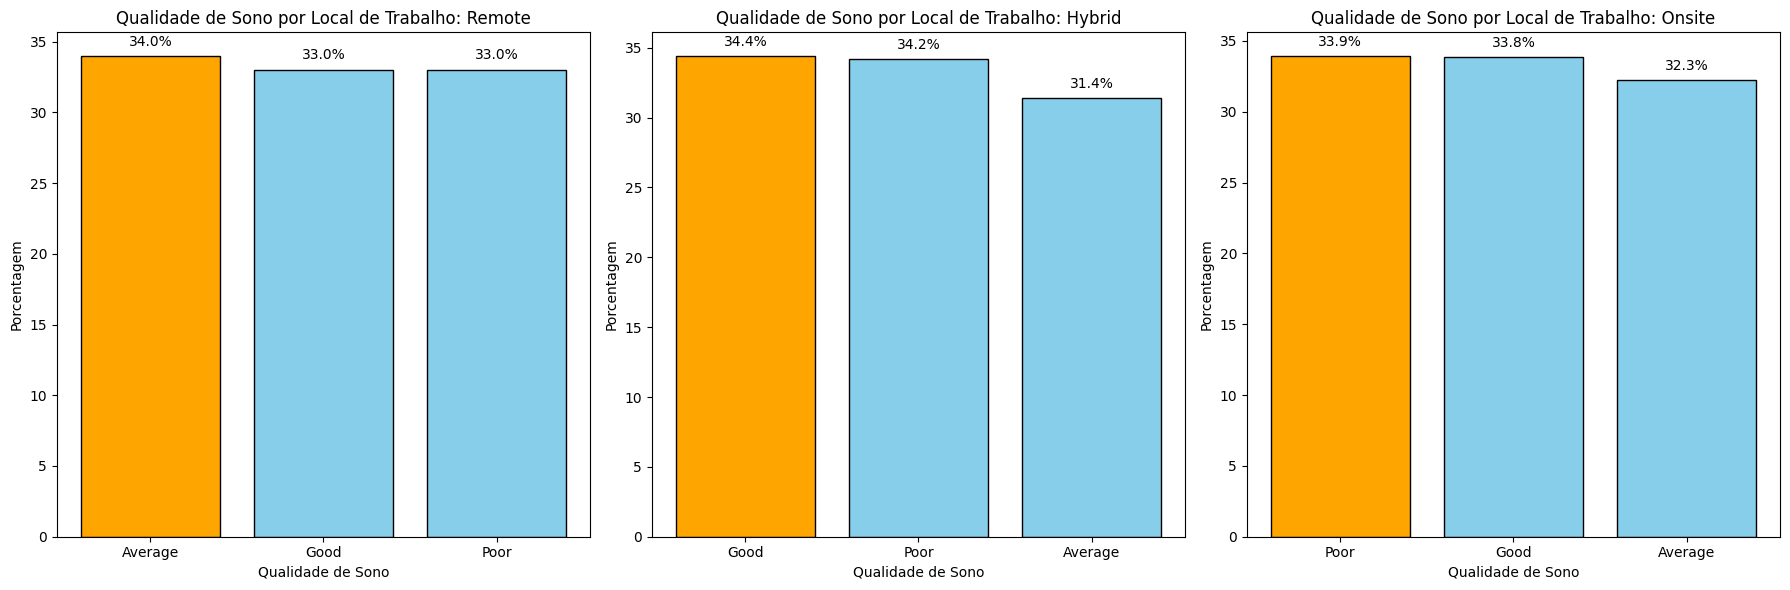

In [121]:
# Calculando a quantidade total de funcionários por local de trabalho para calcular a porcentagem
result5_0['Total'] = result5_0.groupby('Local_de_Trabalho')['Quantidade_de_Funcionários'].transform('sum')
result5_0['Porcentagem'] = (result5_0['Quantidade_de_Funcionários'] / result5_0['Total']) * 100

# Obtendo os locais de trabalho únicos
work_locations = result5_0['Local_de_Trabalho'].unique()

# Configurando o tamanho da figura
plt.figure(figsize=(18, 6))

# Loop para criar um gráfico para cada local de trabalho
for i, location in enumerate(work_locations, 1):
    plt.subplot(1, 3, i)

    # Filtrando os dados para o local de trabalho específico
    subset = result5_0[result5_0['Local_de_Trabalho'] == location]

    # Criando o gráfico de barras
    bars = plt.bar(subset['Qualidade_de_Sono'], subset['Porcentagem'], color='skyblue', edgecolor='black')

    # Adicionando as porcentagens centralizadas acima de cada barra
    for bar, perc in zip(bars, subset['Porcentagem']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
                 f"{perc:.1f}%", ha='center', va='bottom', fontsize=10)

    # Destacando a barra com a maior porcentagem
    max_index = subset['Porcentagem'].idxmax()  # Índice da maior porcentagem
    relative_max_index = subset.index.get_loc(max_index)  # Índice relativo no gráfico
    bars[relative_max_index].set_color('orange')  # Alterando a cor da barra para laranja
    bars[relative_max_index].set_edgecolor('black')  # Opcional: adiciona um contorno preto

    # Personalizando o gráfico
    plt.title(f'Qualidade de Sono por Local de Trabalho: {location}')
    plt.xlabel('Qualidade de Sono')
    plt.ylabel('Porcentagem')

# Ajustando o layout
plt.tight_layout()
plt.show()